# Predicting Multiple Sclerosis from Dynamics of Gait Variability - A Deep Learning Approach
### Ablation Study using the Traditional ML algorithms on subject generalization framework namely to classify HOA/MS sequences of strides and subjects 
We are doing Ablation Study only on **regress-N data** for the subject generalization framework using the Traditional ML algorithms only.

In [17]:
from importlib import reload
import utils.utils_traditional_methods
reload(utils.utils_traditional_methods)
from utils.utils_traditional_methods import extract_data_subject_generalize, models_subject_generalize, plot_ROC_subject_generalize, run_ml_models
from utils.package_imports import *
import xgboost

In [18]:
#Regress-N data
print ('regress-N data')
X_regressN, Y_regressN = extract_data_subject_generalize("data/summary_statistics_regressN_data_5strides.csv")
data_type = 'regressN_data'
results_dir = 'ablation_results_5strides\\' #Depends on how many strides per sequence were selected for computing summary statistics

save_results = True

regress-N data
X shape:  (1436, 42)


,ButterflySQ_x_mean,Butterfly_x_abs_mean,DS_L_mean,DS_R_mean,LeftFPA_mean,RightFPA_mean,SS_R_mean,cadence_mean,force_HSL_mean,force_HSR_mean,...,force_MidSSR_std,force_TOL_std,force_TOR_std,stance_time_std,stride_length_std,stride_speed_std,stride_time_std,stride_width_std,swing_time_std,walk_ratio_std
651,4.144122,7.052191,2.238617,1.759346,0.345478,-1.586368,0.712733,0.858601,1.004155,0.973706,...,0.014605,0.034511,0.020771,0.096884,0.059059,0.040646,0.057045,0.114004,0.057576,0.084144
411,3.398266,1.565104,0.864612,0.913773,-0.402824,0.548152,0.996325,1.039766,0.777990,0.891392,...,0.035964,0.033113,0.009434,0.041183,0.028998,0.032263,0.032096,0.112465,0.030436,0.054584
342,0.451601,0.467368,0.613761,0.621876,0.536454,-0.210394,0.875844,1.254634,1.081738,0.965817,...,0.054681,0.026480,0.013966,0.007588,0.008290,0.015181,0.003741,0.098931,0.011454,0.006302
1298,0.671041,1.574216,1.116700,1.065944,0.247690,-0.259387,1.123092,0.879531,0.878090,0.916255,...,0.025024,0.027691,0.021829,0.021294,0.028062,0.026348,0.006885,0.133049,0.040566,0.031062
483,5.335893,3.874526,0.815647,0.835771,-1.210425,0.952603,1.155569,0.955579,0.905973,0.899402,...,0.059115,0.020853,0.026985,0.082075,0.029125,0.088703,0.086127,0.286329,0.095282,0.099448


Y shape:  (1436, 2)


In [19]:
ml_models = ['random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'decision_tree',  'linear_svm', 
             'logistic_regression', 'mlp']

spatial = ['stride_length', 'stride_width', 'LeftFPA', 'RightFPA']
temporal = ['stride_time', 'swing_time', 'stance_time', 'SS_R', 'DS_L', 'DS_R', 'cadence' ]
spatiotemporal = ['stride_speed', 'walk_ratio']
kinetic = ['force_HSR', 'force_MidSSR', 'force_TOR', 'force_HSL', 'force_TOL', 'force_MidSSL', 'Butterfly_x_abs', 'ButterflySQ_x']

spatial_features = [s for s in X_regressN.columns if any(x in s for x in spatial)]
print ('Spatial features: ', spatial_features, '\nNumber of spatial features = ', len(spatial_features))

temporal_features = [s for s in X_regressN.columns if any(x in s for x in temporal)]
print ('\nTemporal features: ', temporal_features, '\nNumber of temporal features = ', len(temporal_features))

spatiotemporal_features = [s for s in X_regressN.columns if any(x in s for x in spatiotemporal)]
print ('\nSpatiotemporal features: ', spatiotemporal_features, '\nNumber of spatiotemporal features = ', len(spatiotemporal_features))

kinetic_features = [s for s in X_regressN.columns if any(x in s for x in kinetic)]
print ('\nKinetic features: ', kinetic_features, '\nNumber of kinetic_features = ', len(kinetic_features))

datastreams = {'spatial': spatial_features, 'temporal': temporal_features, 'kinetic': kinetic_features, 
        'spatiotemporal': spatial_features+temporal_features+spatiotemporal_features, 'spatial_kinetic': spatial_features+kinetic_features,\
       'temporal_kinetic':  temporal_features+kinetic_features}

ablation_columns = list(itertools.product(ml_models,datastreams))
regressN_metrics = pd.DataFrame(columns = ablation_columns) #Dataframe to store accuracies for each ML model for raw data 

Spatial features:  ['LeftFPA_mean', 'RightFPA_mean', 'stride_length_mean', 'stride_width_mean', 'LeftFPA_std', 'RightFPA_std', 'stride_length_std', 'stride_width_std'] 
Number of spatial features =  8

Temporal features:  ['DS_L_mean', 'DS_R_mean', 'SS_R_mean', 'cadence_mean', 'stance_time_mean', 'stride_time_mean', 'swing_time_mean', 'DS_L_std', 'DS_R_std', 'SS_R_std', 'cadence_std', 'stance_time_std', 'stride_time_std', 'swing_time_std'] 
Number of temporal features =  14

Spatiotemporal features:  ['stride_speed_mean', 'walk_ratio_mean', 'stride_speed_std', 'walk_ratio_std'] 
Number of spatiotemporal features =  4

Kinetic features:  ['ButterflySQ_x_mean', 'Butterfly_x_abs_mean', 'force_HSL_mean', 'force_HSR_mean', 'force_MidSSL_mean', 'force_MidSSR_mean', 'force_TOL_mean', 'force_TOR_mean', 'ButterflySQ_x_std', 'Butterfly_x_abs_std', 'force_HSL_std', 'force_HSR_std', 'force_MidSSL_std', 'force_MidSSR_std', 'force_TOL_std', 'force_TOR_std'] 
Number of kinetic_features =  16


spatial
random_forest
best_params:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 0.1, 'randomforestclassifier__n_estimators': 50}
Stride-based model performance (mean):  [0.5463536186495054, 0.4898417055116747, 0.44403552299414173, 0.4273054801862556, 0.4780842983559883]
Stride-based model performance (standard deviation):  [0.11728495991929842, 0.30786635564494286, 0.22873373809037528, 0.22171177898551483, 0.1774857861979267]
Person-based model performance (mean):  [0.45714285714285713, 0.34, 0.2833333333333333, 0.301010101010101, 0.58]
Person-based model performance (standard deviation):  [0.10690449676496976, 0.30724582991474436, 0.26666666666666666, 0.27732010045894495, 0.2638181191654584]


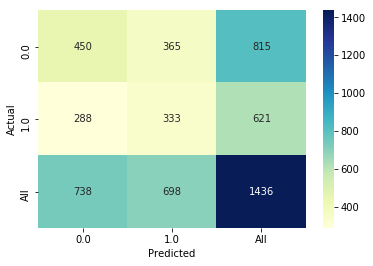

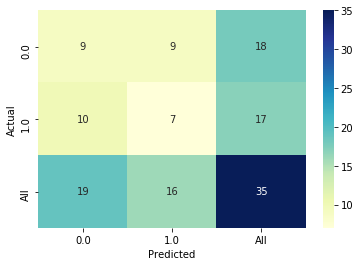

********************************
adaboost
best_params:  {'adaboostclassifier__learning_rate': 2, 'adaboostclassifier__n_estimators': 50}
Stride-based model performance (mean):  [0.6159868076207472, 0.5894498368265185, 0.43390574783885166, 0.4253407566868021, 0.5467593415006653]
Stride-based model performance (standard deviation):  [0.08140952834811845, 0.3191132140931286, 0.24316436288765014, 0.21872842853059002, 0.10497035740332304]
Person-based model performance (mean):  [0.6285714285714286, 0.5066666666666667, 0.6866666666666666, 0.55, 0.5666666666666667]
Person-based model performance (standard deviation):  [0.11428571428571432, 0.09752492558885195, 0.26964997888208914, 0.11832159566199227, 0.14757295747452434]


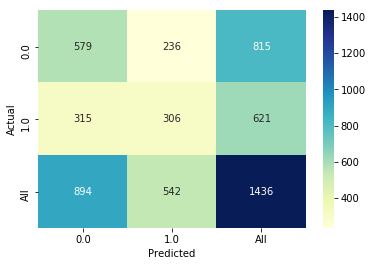

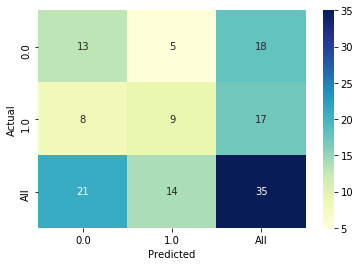

********************************
kernel_svm
best_params:  {'svc__gamma': 0.0001}
Stride-based model performance (mean):  [0.5673398593964943, 0.0, 0.0, 0.0, 0.5694375811819774]
Stride-based model performance (standard deviation):  [0.22136075123018575, 0.0, 0.0, 0.0, 0.16943041129332745]
Person-based model performance (mean):  [0.5142857142857142, 0.0, 0.0, 0.0, 0.48]
Person-based model performance (standard deviation):  [0.19378085666072195, 0.0, 0.0, 0.0, 0.039999999999999994]


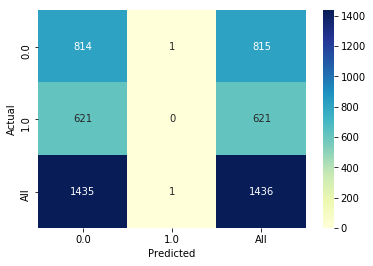

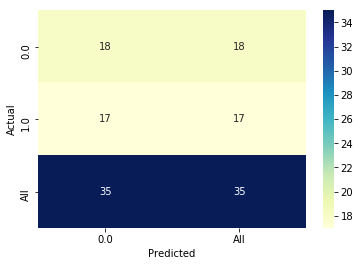

********************************
gbm
best_params:  {'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__max_depth': 7, 'gradientboostingclassifier__max_features': 'log2', 'gradientboostingclassifier__min_samples_leaf': 3, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 150}
Stride-based model performance (mean):  [0.5211613443971856, 0.4322662003915506, 0.4011798921218201, 0.38062387614676085, 0.4674850484410378]
Stride-based model performance (standard deviation):  [0.10437114207027905, 0.1763597164115001, 0.13422643179349536, 0.12148383489514751, 0.13027825714890529]
Person-based model performance (mean):  [0.5142857142857142, 0.4666666666666666, 0.5700000000000001, 0.4666666666666666, 0.58]
Person-based model performance (standard deviation):  [0.11428571428571431, 0.09189365834726813, 0.2659156090023884, 0.09189365834726813, 0.21118712081942875]


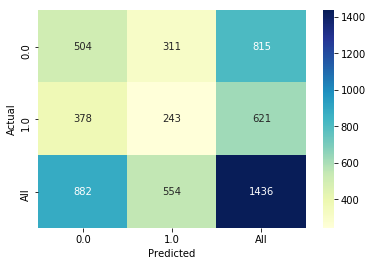

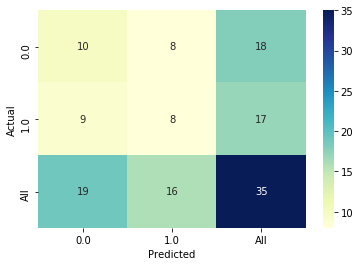

********************************
xgboost
best_params:  {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__gamma': 0.1, 'xgbclassifier__max_depth': 8, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__subsample': 1.0}
Stride-based model performance (mean):  [0.5185611947879414, 0.4263338675320242, 0.3743148443712073, 0.36770933475200207, 0.4606289107166125]
Stride-based model performance (standard deviation):  [0.10318940773222002, 0.19621751226295472, 0.11601982385189291, 0.13362491112967326, 0.12527620887398166]
Person-based model performance (mean):  [0.48571428571428577, 0.32666666666666666, 0.4866666666666667, 0.3571428571428571, 0.5266666666666667]
Person-based model performance (standard deviation):  [0.14568627181693672, 0.21333333333333335, 0.3276854860651868, 0.20682241223832978, 0.23981474331473265]


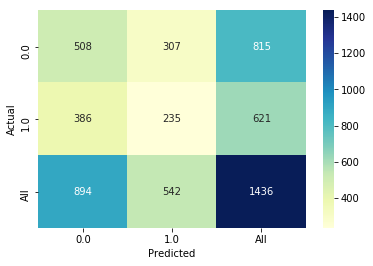

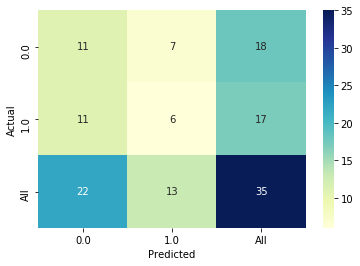

********************************
decision_tree
best_params:  {'decisiontreeclassifier__min_samples_split': 4}
Stride-based model performance (mean):  [0.5138465944739199, 0.4112514868979894, 0.337994460795639, 0.36067179351311346, 0.45073709745051743]
Stride-based model performance (standard deviation):  [0.09587299662787721, 0.28448305873861535, 0.18432858947812997, 0.22927030687056088, 0.11236644243326793]
Person-based model performance (mean):  [0.5428571428571428, 0.3066666666666667, 0.49333333333333335, 0.36000000000000004, 0.4833333333333333]
Person-based model performance (standard deviation):  [0.13997084244475305, 0.2969474326842679, 0.4165466493816882, 0.31368774282716244, 0.2973961069759395]


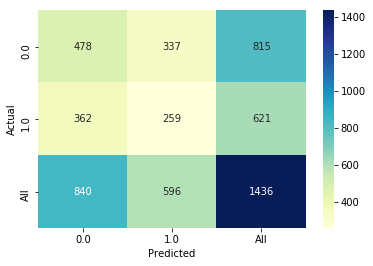

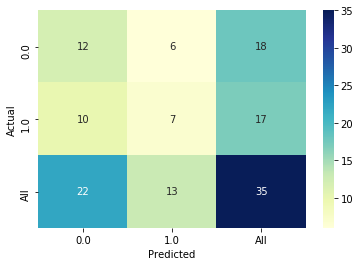

********************************
linear_svm
best_params:  {'linearsvc__loss': 'squared_hinge'}
Stride-based model performance (mean):  [0.5255654013663522, 0.5293237644136232, 0.24041518846078785, 0.29236290182601693, 0.5147083595885644]
Stride-based model performance (standard deviation):  [0.09525009210660226, 0.35572430463768456, 0.08695572312976742, 0.1423899284460989, 0.18469920468759987]
Person-based model performance (mean):  [0.42857142857142855, 0.08, 0.3, 0.12380952380952381, 0.44666666666666666]
Person-based model performance (standard deviation):  [0.09035079029052512, 0.09797958971132714, 0.39999999999999997, 0.1523809523809524, 0.2153550040695079]


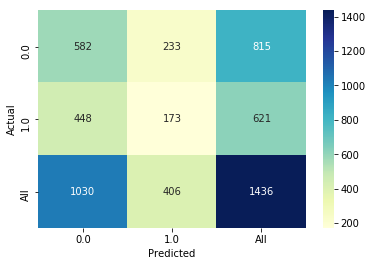

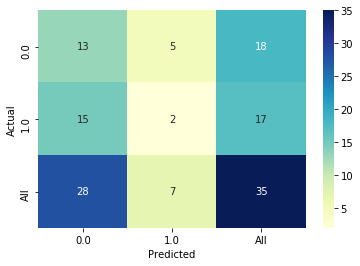

********************************
logistic_regression
best_params:  {'logisticregression__random_state': 0}
Stride-based model performance (mean):  [0.5255271952336855, 0.5263039003196659, 0.2507281351244455, 0.30177275783567686, 0.5204272072449806]
Stride-based model performance (standard deviation):  [0.10111187347192649, 0.349716325738195, 0.08535951130208617, 0.1391659492785014, 0.19015451864063657]
Person-based model performance (mean):  [0.42857142857142855, 0.08, 0.3, 0.12380952380952381, 0.44666666666666666]
Person-based model performance (standard deviation):  [0.09035079029052512, 0.09797958971132714, 0.39999999999999997, 0.1523809523809524, 0.2153550040695079]


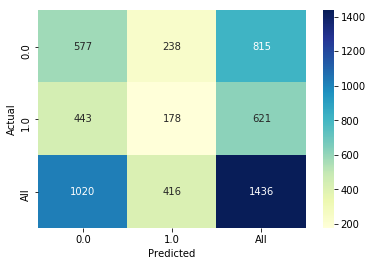

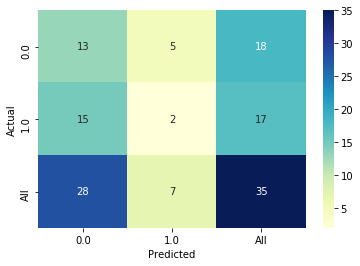

********************************
mlp
best_params:  {'mlpclassifier__hidden_layer_sizes': (5, 5, 5, 5, 10, 100, 50, 10, 50, 10)}
Stride-based model performance (mean):  [0.5888548998082896, 0.5267762392910376, 0.43010570574569795, 0.44772204489322104, 0.5025030315296604]
Stride-based model performance (standard deviation):  [0.09240080635153029, 0.23526243409298828, 0.09801650291182654, 0.14565099923058744, 0.10912818412119175]
Person-based model performance (mean):  [0.6285714285714284, 0.42666666666666664, 0.8, 0.5276190476190477, 0.525]
Person-based model performance (standard deviation):  [0.1456862718169367, 0.06463573143221772, 0.26666666666666666, 0.0883920354298827, 0.12041594578792293]


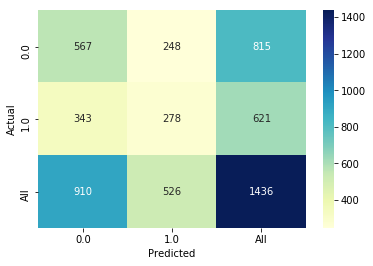

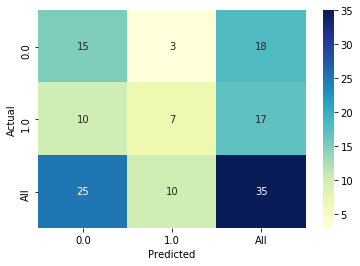

********************************


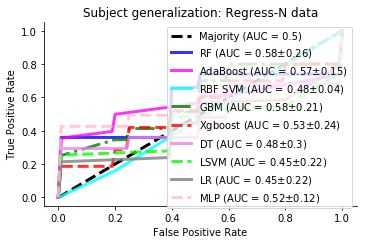

********************************
temporal
random_forest
best_params:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': None, 'randomforestclassifier__min_samples_leaf': 0.05, 'randomforestclassifier__n_estimators': 50}
Stride-based model performance (mean):  [0.5520512907697694, 0.476574766154722, 0.4908731418936143, 0.4513397904438614, 0.5887111026458076]
Stride-based model performance (standard deviation):  [0.09374386940742237, 0.2761401951707893, 0.11459748048595796, 0.17616926603496857, 0.1323633615934565]
Person-based model performance (mean):  [0.6571428571428571, 0.6066666666666667, 0.7, 0.611111111111111, 0.68]
Person-based model performance (standard deviation):  [0.19378085666072192, 0.25333333333333335, 0.26666666666666666, 0.1859244503409057, 0.19390719429665315]


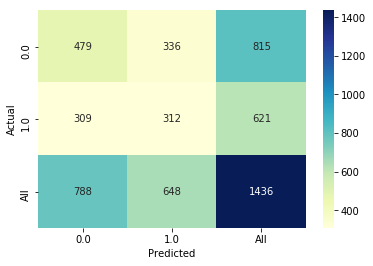

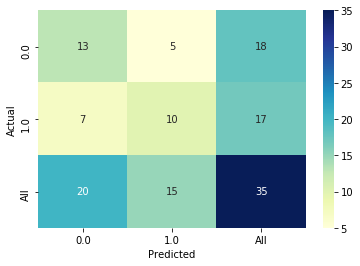

********************************
adaboost
best_params:  {'adaboostclassifier__learning_rate': 1.5, 'adaboostclassifier__n_estimators': 150}
Stride-based model performance (mean):  [0.5494061855419854, 0.4762002556983522, 0.43731362983347805, 0.42563787909358536, 0.5543738346798299]
Stride-based model performance (standard deviation):  [0.04654122710935211, 0.27880973864509917, 0.07543823591419109, 0.1633510822109938, 0.12487960451494483]
Person-based model performance (mean):  [0.5714285714285714, 0.38666666666666666, 0.6666666666666666, 0.440952380952381, 0.6933333333333332]
Person-based model performance (standard deviation):  [0.09035079029052513, 0.11274356350191841, 0.27888667551135854, 0.08419823278209657, 0.16786237749352229]


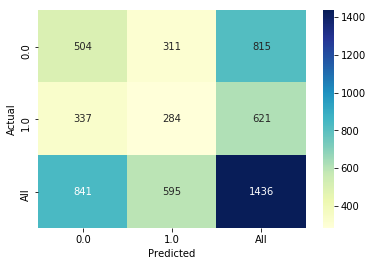

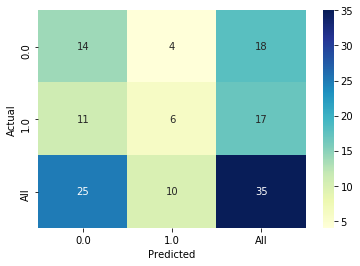

********************************
kernel_svm
best_params:  {'svc__gamma': 0.0001}
Stride-based model performance (mean):  [0.5715696573762924, 0.2363636363636364, 0.057729468599033815, 0.09239717490652263, 0.4918399057596443]
Stride-based model performance (standard deviation):  [0.2293835881314416, 0.3882573909829568, 0.102138217403035, 0.16177829643843467, 0.16734106273056853]
Person-based model performance (mean):  [0.5428571428571428, 0.1, 0.2, 0.13333333333333333, 0.5700000000000001]
Person-based model performance (standard deviation):  [0.22857142857142856, 0.2, 0.4, 0.26666666666666666, 0.09797958971132713]


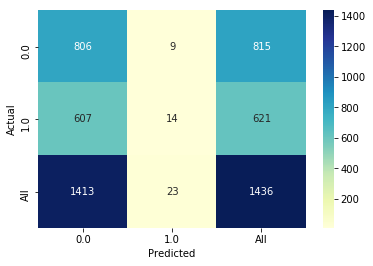

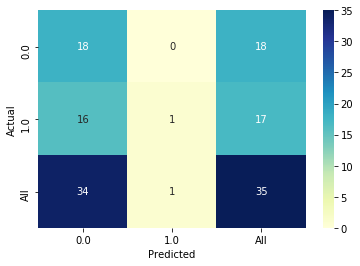

********************************
gbm
best_params:  {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__max_features': 'auto', 'gradientboostingclassifier__min_samples_leaf': 3, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 150}
Stride-based model performance (mean):  [0.5332384095969255, 0.4758880510745979, 0.3932013682531252, 0.3969416094824103, 0.5670157942895653]
Stride-based model performance (standard deviation):  [0.03687666083781375, 0.292626891338949, 0.05627225477195247, 0.15271017813494295, 0.10949263373262878]
Person-based model performance (mean):  [0.5714285714285714, 0.4266666666666666, 0.6333333333333333, 0.45666666666666667, 0.69]
Person-based model performance (standard deviation):  [0.09035079029052513, 0.1420485050177501, 0.30550504633038933, 0.1489220526912578, 0.13564659966250536]


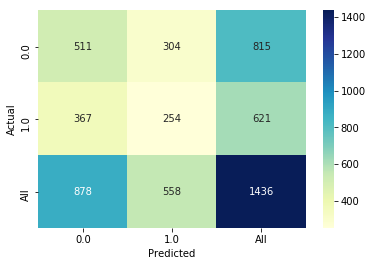

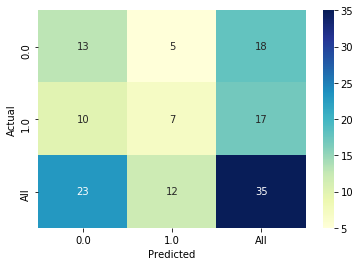

********************************
xgboost
best_params:  {'xgbclassifier__colsample_bytree': 0.6, 'xgbclassifier__gamma': 2, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__subsample': 0.6}
Stride-based model performance (mean):  [0.5375864349696512, 0.4783319812931858, 0.37915014428177907, 0.3886095811484626, 0.5825829017202737]
Stride-based model performance (standard deviation):  [0.042528325246557405, 0.2925295933571838, 0.05040615776226999, 0.14473525505436452, 0.11845593275327998]
Person-based model performance (mean):  [0.5714285714285714, 0.38666666666666666, 0.4666666666666666, 0.41, 0.65]
Person-based model performance (standard deviation):  [0.15649215928719032, 0.2114500203620494, 0.32317865716108857, 0.2416609194718914, 0.15491933384829668]


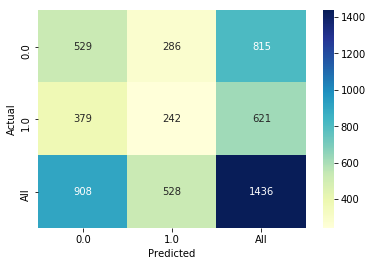

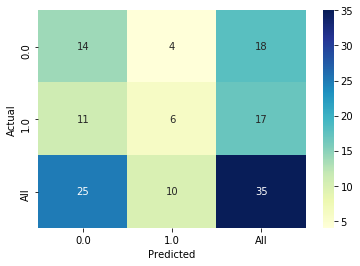

********************************
decision_tree
best_params:  {'decisiontreeclassifier__min_samples_split': 32}
Stride-based model performance (mean):  [0.5482122583791662, 0.4684856085647727, 0.44579435794324096, 0.4220178227679581, 0.548222046847962]
Stride-based model performance (standard deviation):  [0.07873828580291363, 0.24708118472927165, 0.1166240517111901, 0.13459764652902528, 0.10228588672321584]
Person-based model performance (mean):  [0.6571428571428571, 0.4666666666666666, 0.7, 0.5244444444444445, 0.6966666666666667]
Person-based model performance (standard deviation):  [0.1456862718169367, 0.20110804171997812, 0.2449489742783178, 0.19288581666780205, 0.14391355429948602]


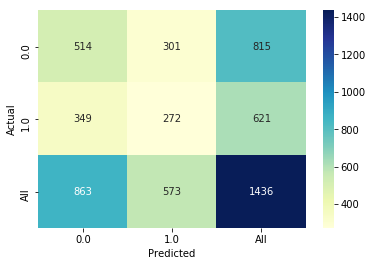

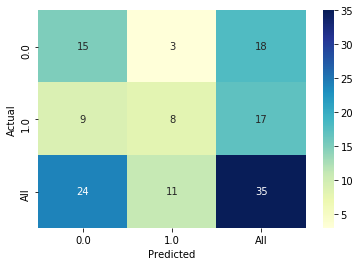

********************************
linear_svm
best_params:  {'linearsvc__loss': 'squared_hinge'}
Stride-based model performance (mean):  [0.4365268652045213, 0.48059350095547676, 0.29308258373815155, 0.26011776333559183, 0.5172846398656519]
Stride-based model performance (standard deviation):  [0.1135683507229425, 0.36133803463926256, 0.24164428439053687, 0.1766823117914451, 0.15655521741998454]
Person-based model performance (mean):  [0.42857142857142855, 0.2733333333333333, 0.3833333333333333, 0.26666666666666666, 0.5233333333333333]
Person-based model performance (standard deviation):  [0.15649215928719035, 0.26865922239479845, 0.3929942040850532, 0.2494438257849294, 0.19877402021167434]


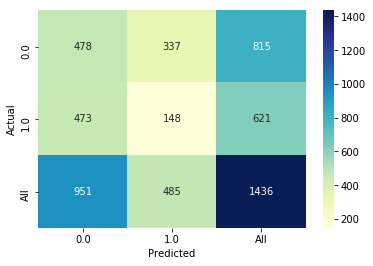

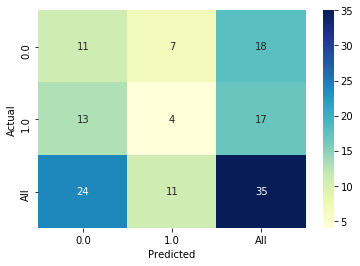

********************************
logistic_regression
best_params:  {'logisticregression__random_state': 0}
Stride-based model performance (mean):  [0.4203978346764622, 0.5122894420302196, 0.23443728689422683, 0.20555909776887432, 0.4460937437279762]
Stride-based model performance (standard deviation):  [0.1302403431836598, 0.35811170853757385, 0.2014963874830077, 0.12664712636642014, 0.13997916804552626]
Person-based model performance (mean):  [0.3428571428571428, 0.16666666666666666, 0.24, 0.15714285714285717, 0.5266666666666667]
Person-based model performance (standard deviation):  [0.19378085666072195, 0.21081851067789195, 0.3878143885933063, 0.20404081224408144, 0.2217606317130653]


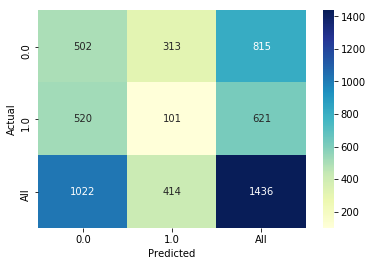

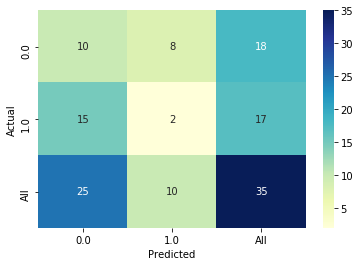

********************************
mlp
best_params:  {'mlpclassifier__hidden_layer_sizes': (50, 50, 50, 50, 30, 5, 100, 20, 100)}
Stride-based model performance (mean):  [0.5911015787643527, 0.5257725703048876, 0.47055374098137215, 0.4617484674758666, 0.6523354006373923]
Stride-based model performance (standard deviation):  [0.0685130042540202, 0.27024133094579766, 0.10530925700490038, 0.1276958116764917, 0.09131766787089667]
Person-based model performance (mean):  [0.6, 0.5266666666666666, 0.7133333333333333, 0.5419047619047619, 0.74]
Person-based model performance (standard deviation):  [0.13997084244475302, 0.24257873864880336, 0.24908722256359206, 0.08854582323176731, 0.08602325267042632]


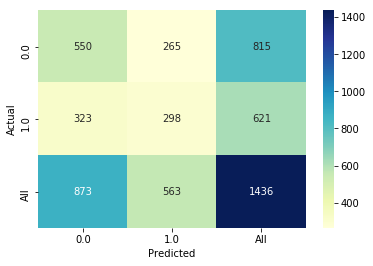

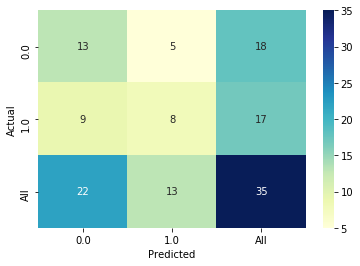

********************************


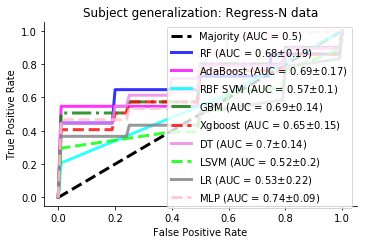

********************************
kinetic
random_forest
best_params:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 0.1, 'randomforestclassifier__n_estimators': 40}
Stride-based model performance (mean):  [0.5835294756687894, 0.46941216938068564, 0.4702370885600179, 0.44900714876521325, 0.5227018027252004]
Stride-based model performance (standard deviation):  [0.0964487348233244, 0.27311226976360503, 0.2258610732004878, 0.23395474341499203, 0.14962737827978229]
Person-based model performance (mean):  [0.6571428571428571, 0.6133333333333333, 0.6428571428571428, 0.5942857142857143, 0.6233333333333333]
Person-based model performance (standard deviation):  [0.06998542122237654, 0.2114500203620494, 0.2233531314201633, 0.1480148304146437, 0.10413666234542206]


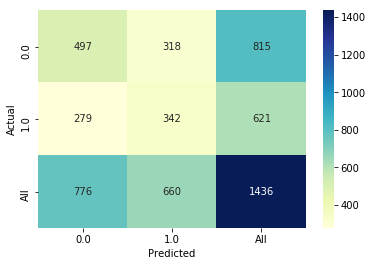

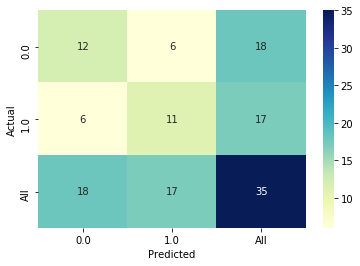

********************************
adaboost
best_params:  {'adaboostclassifier__learning_rate': 2, 'adaboostclassifier__n_estimators': 75}
Stride-based model performance (mean):  [0.6168628220224954, 0.6207276657801879, 0.28755975925640537, 0.373285185158703, 0.5566282611107348]
Stride-based model performance (standard deviation):  [0.1421881845902572, 0.30543839990404187, 0.12368674822249308, 0.16378250446526119, 0.07356890198994528]
Person-based model performance (mean):  [0.6, 0.2866666666666667, 0.8, 0.4142857142857143, 0.6233333333333333]
Person-based model performance (standard deviation):  [0.16659862556700858, 0.17333333333333334, 0.4000000000000001, 0.2340610614751335, 0.14204850501775013]


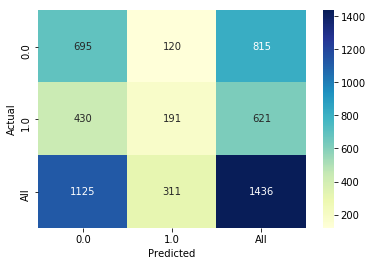

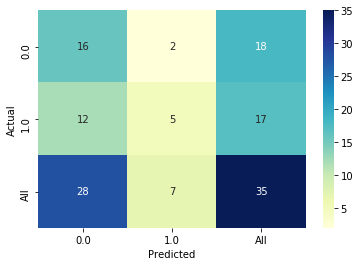

********************************
kernel_svm
best_params:  {'svc__gamma': 0.0001}
Stride-based model performance (mean):  [0.5701321890180923, 0.4, 0.008157349896480332, 0.01598727381189103, 0.537887042589612]
Stride-based model performance (standard deviation):  [0.22349285455307336, 0.48989794855663565, 0.010026861889700816, 0.019648467886761754, 0.12774667341255247]
Person-based model performance (mean):  [0.5142857142857142, 0.0, 0.0, 0.0, 0.5833333333333333]
Person-based model performance (standard deviation):  [0.19378085666072195, 0.0, 0.0, 0.0, 0.10540925533894598]


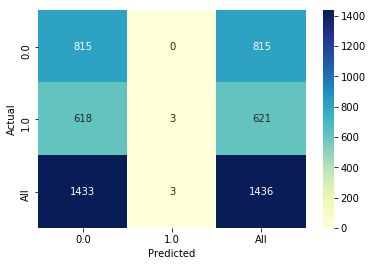

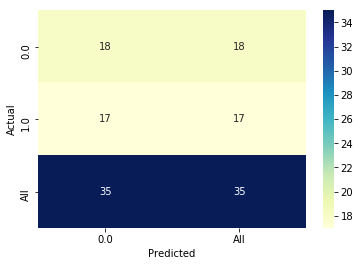

********************************
gbm
best_params:  {'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__max_depth': 2, 'gradientboostingclassifier__max_features': 'auto', 'gradientboostingclassifier__min_samples_leaf': 1, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 50}
Stride-based model performance (mean):  [0.5199452442853641, 0.4846845746845746, 0.31651304021099536, 0.34702202324272835, 0.48099354985036624]
Stride-based model performance (standard deviation):  [0.11117856577607954, 0.3063280790173871, 0.14299576500767877, 0.19226922992587564, 0.16217020498664708]
Person-based model performance (mean):  [0.5142857142857142, 0.2866666666666667, 0.6, 0.3466666666666667, 0.5133333333333334]
Person-based model performance (standard deviation):  [0.11428571428571431, 0.1733333333333333, 0.38873012632302, 0.18451136670797397, 0.16241236953439775]


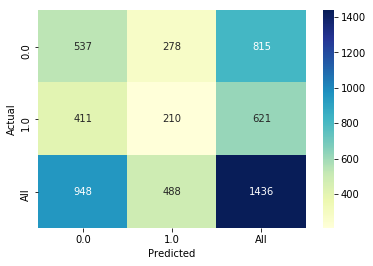

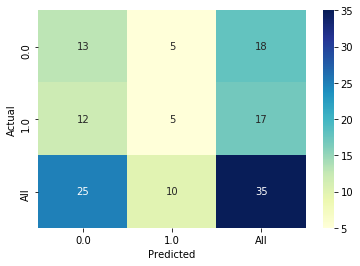

********************************
xgboost
best_params:  {'xgbclassifier__colsample_bytree': 0.6, 'xgbclassifier__gamma': 2, 'xgbclassifier__max_depth': 7, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__subsample': 0.6}
Stride-based model performance (mean):  [0.49761639215132386, 0.42878183592469304, 0.30726981340713294, 0.32883934347401517, 0.4678423570239886]
Stride-based model performance (standard deviation):  [0.0694831042766886, 0.29231895727118157, 0.14157659273397546, 0.1871794010315365, 0.1282749016550437]
Person-based model performance (mean):  [0.45714285714285713, 0.2866666666666667, 0.5, 0.32666666666666666, 0.42666666666666664]
Person-based model performance (standard deviation):  [0.10690449676496974, 0.1733333333333333, 0.33333333333333337, 0.17178798302300166, 0.1420485050177501]


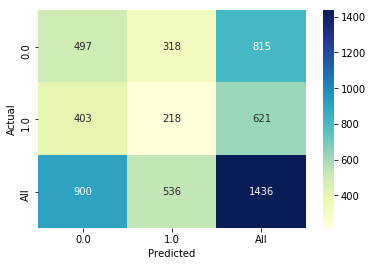

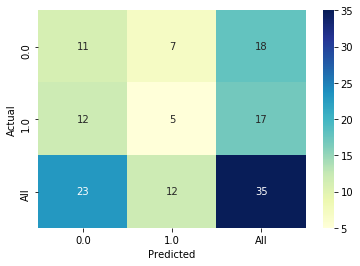

********************************
decision_tree
best_params:  {'decisiontreeclassifier__min_samples_split': 48}
Stride-based model performance (mean):  [0.5179311313256125, 0.4450460183299613, 0.33365724650012113, 0.3546624383483333, 0.47229561027057604]
Stride-based model performance (standard deviation):  [0.05197743193365261, 0.2783227901559906, 0.09006788511782324, 0.1693248664940408, 0.11313211192722555]
Person-based model performance (mean):  [0.5142857142857142, 0.3, 0.41666666666666663, 0.3276190476190476, 0.5533333333333333]
Person-based model performance (standard deviation):  [0.11428571428571428, 0.25298221281347033, 0.4013864859597432, 0.28082159990829886, 0.15719768163402129]


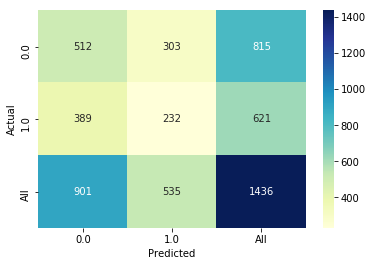

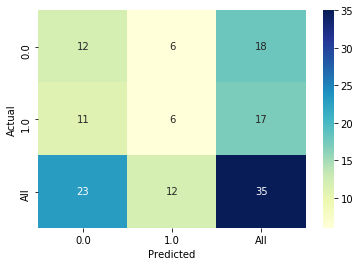

********************************
linear_svm
best_params:  {'linearsvc__loss': 'squared_hinge'}
Stride-based model performance (mean):  [0.5808986845913262, 0.48104220779220774, 0.3524707911625645, 0.3912499789691219, 0.5667754803289785]
Stride-based model performance (standard deviation):  [0.08570348523563943, 0.29339951942356013, 0.12574120269406078, 0.1756219059762837, 0.1631488277846123]
Person-based model performance (mean):  [0.6, 0.36666666666666664, 0.5166666666666666, 0.4076190476190476, 0.64]
Person-based model performance (standard deviation):  [0.05714285714285716, 0.20439612955674522, 0.3431876713662333, 0.2281265511859789, 0.1854723699099141]


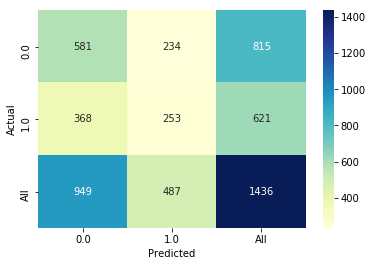

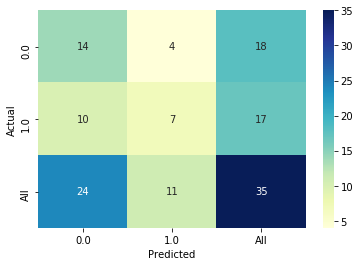

********************************
logistic_regression
best_params:  {'logisticregression__random_state': 0}
Stride-based model performance (mean):  [0.579992268078254, 0.48460678873251906, 0.3618627488585428, 0.39538782197162314, 0.5764284431862927]
Stride-based model performance (standard deviation):  [0.08331719767315177, 0.26927940619003204, 0.1143175867450362, 0.15655635656929034, 0.15986276469412375]
Person-based model performance (mean):  [0.5714285714285714, 0.32666666666666666, 0.5166666666666666, 0.36, 0.7166666666666667]
Person-based model performance (standard deviation):  [0.09035079029052513, 0.21333333333333332, 0.3431876713662333, 0.2133333333333333, 0.1960725489313699]


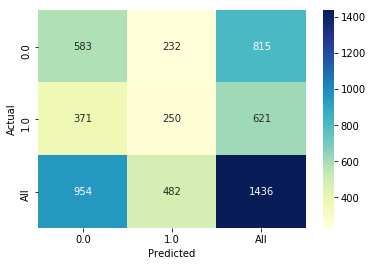

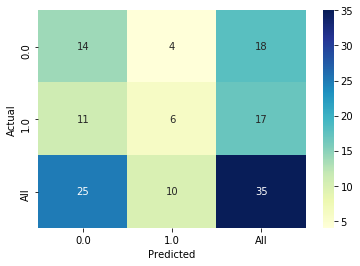

********************************
mlp
best_params:  {'mlpclassifier__hidden_layer_sizes': (50, 50, 5, 30, 5, 5, 50, 10)}
Stride-based model performance (mean):  [0.6488435066380498, 0.39243433470902517, 0.29698919981607463, 0.3324517957929326, 0.5553277898388057]
Stride-based model performance (standard deviation):  [0.1315080196074486, 0.3331519092666048, 0.24429539701617456, 0.27216196058779807, 0.09467144772663016]
Person-based model performance (mean):  [0.6571428571428571, 0.3333333333333333, 0.4833333333333333, 0.38095238095238093, 0.5700000000000001]
Person-based model performance (standard deviation):  [0.06998542122237654, 0.28596814119369623, 0.4096068575814836, 0.3129843185743806, 0.132664991614216]


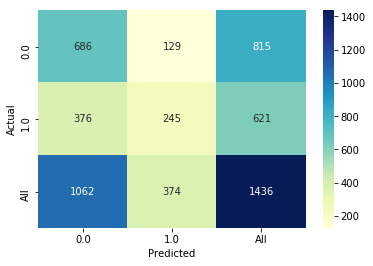

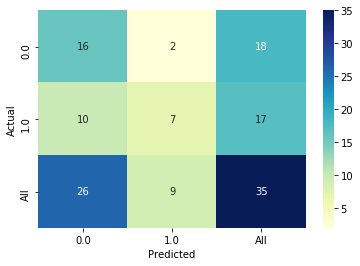

********************************


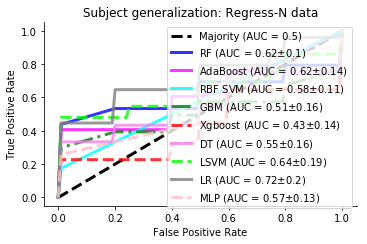

********************************
spatiotemporal
random_forest
best_params:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 0.05, 'randomforestclassifier__n_estimators': 45}
Stride-based model performance (mean):  [0.5264739935435471, 0.4100331128014611, 0.42405397692236646, 0.4024093598505868, 0.45293632658572935]
Stride-based model performance (standard deviation):  [0.10961232132084144, 0.2646572504905243, 0.2071673240373721, 0.23682077299785334, 0.17822653837626623]
Person-based model performance (mean):  [0.5428571428571429, 0.4800000000000001, 0.42666666666666664, 0.43999999999999995, 0.6]
Person-based model performance (standard deviation):  [0.10690449676496977, 0.2638181191654584, 0.30525035262514894, 0.278408173570948, 0.2469817807045694]


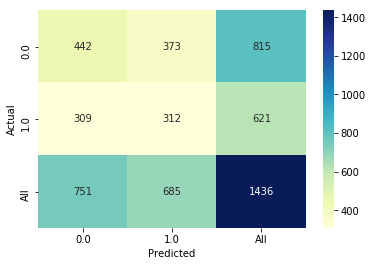

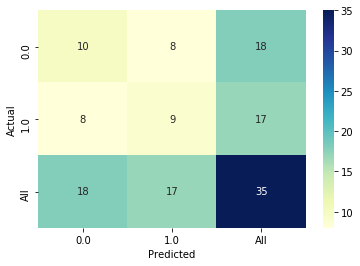

********************************
adaboost
best_params:  {'adaboostclassifier__learning_rate': 2, 'adaboostclassifier__n_estimators': 50}
Stride-based model performance (mean):  [0.5641052745197019, 0.42663540163540165, 0.3855431300644693, 0.3883772909621271, 0.5094892536775821]
Stride-based model performance (standard deviation):  [0.10063631550331616, 0.2724287316656274, 0.1940508582621936, 0.2065739488675966, 0.12489042567478796]
Person-based model performance (mean):  [0.5428571428571428, 0.4, 0.4666666666666666, 0.4188888888888888, 0.4666666666666666]
Person-based model performance (standard deviation):  [0.16659862556700858, 0.20976176963403032, 0.3231786571610886, 0.24194683631934158, 0.09189365834726813]


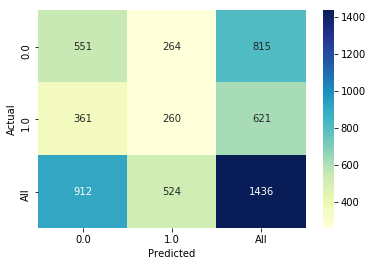

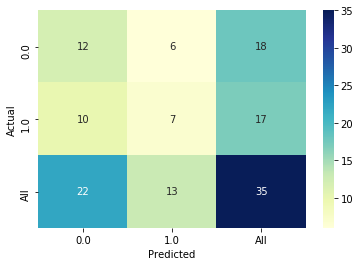

********************************
kernel_svm
best_params:  {'svc__gamma': 0.0001}
Stride-based model performance (mean):  [0.5590113823180173, 0.023529411764705882, 0.005555555555555555, 0.00898876404494382, 0.546507612501962]
Stride-based model performance (standard deviation):  [0.21544933578789557, 0.047058823529411764, 0.01111111111111111, 0.01797752808988764, 0.1933041190788898]
Person-based model performance (mean):  [0.5142857142857142, 0.0, 0.0, 0.0, 0.5]
Person-based model performance (standard deviation):  [0.19378085666072195, 0.0, 0.0, 0.0, 0.0]


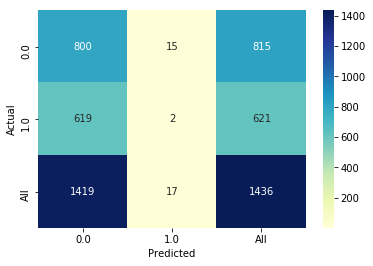

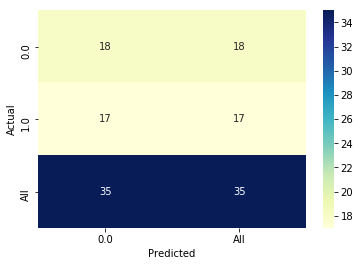

********************************
gbm
best_params:  {'gradientboostingclassifier__learning_rate': 0.15, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__max_features': 'log2', 'gradientboostingclassifier__min_samples_leaf': 1, 'gradientboostingclassifier__min_samples_split': 4, 'gradientboostingclassifier__n_estimators': 50}
Stride-based model performance (mean):  [0.5353318604481275, 0.48572526572526575, 0.33583822789117274, 0.36595287076011485, 0.5146373794328171]
Stride-based model performance (standard deviation):  [0.11068016206202119, 0.2913768217271875, 0.09628415084861468, 0.16933285547206542, 0.16239845420053198]
Person-based model performance (mean):  [0.5428571428571429, 0.38666666666666666, 0.6333333333333333, 0.4314285714285714, 0.6433333333333333]
Person-based model performance (standard deviation):  [0.13997084244475305, 0.11274356350191841, 0.30550504633038933, 0.09747841205275419, 0.22842455598682415]


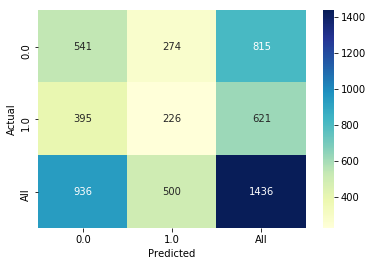

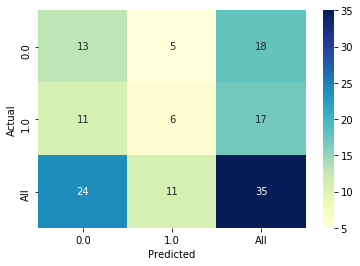

********************************
xgboost
best_params:  {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__gamma': 0.1, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__subsample': 0.6}
Stride-based model performance (mean):  [0.5212601447057834, 0.4616834809407114, 0.3425528458765632, 0.3642490231664687, 0.5202792008594239]
Stride-based model performance (standard deviation):  [0.10650833857776089, 0.26599409197841434, 0.06597293185302118, 0.14995196750651668, 0.17181216999645152]
Person-based model performance (mean):  [0.5428571428571429, 0.38666666666666666, 0.6333333333333333, 0.4314285714285714, 0.6066666666666667]
Person-based model performance (standard deviation):  [0.13997084244475305, 0.11274356350191841, 0.30550504633038933, 0.09747841205275419, 0.17562586496425986]


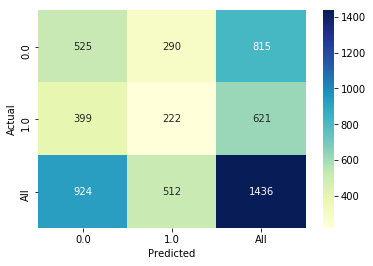

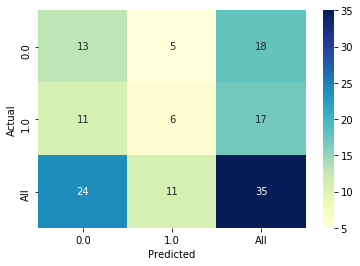

********************************
decision_tree
best_params:  {'decisiontreeclassifier__min_samples_split': 39}
Stride-based model performance (mean):  [0.5125157293558493, 0.476237714469723, 0.5235627402338715, 0.43663128665392953, 0.5563540726637469]
Stride-based model performance (standard deviation):  [0.040157261931310466, 0.21868192184991042, 0.14907707613770677, 0.08631480298929389, 0.039962050968219635]
Person-based model performance (mean):  [0.6, 0.6666666666666667, 0.63, 0.5752380952380952, 0.7066666666666667]
Person-based model performance (standard deviation):  [0.05714285714285716, 0.2859681411936962, 0.2181742422927143, 0.0974225664955765, 0.07423685817106698]


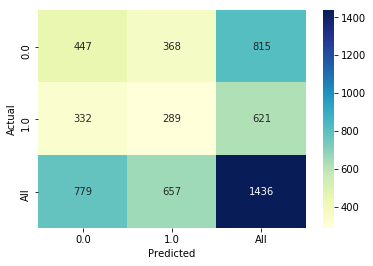

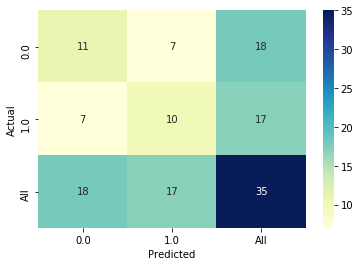

********************************
linear_svm
best_params:  {'linearsvc__loss': 'squared_hinge'}
Stride-based model performance (mean):  [0.5185905300890832, 0.4403495403967102, 0.40899587845303653, 0.3808461731042828, 0.5472279868179868]
Stride-based model performance (standard deviation):  [0.0591763974467871, 0.26603242037510094, 0.18019454868539805, 0.16673628576982621, 0.0884810589095914]
Person-based model performance (mean):  [0.5428571428571429, 0.4533333333333333, 0.5466666666666666, 0.4142857142857143, 0.49333333333333335]
Person-based model performance (standard deviation):  [0.10690449676496977, 0.3512517299285197, 0.3330665599145813, 0.2340610614751335, 0.22025238048909052]


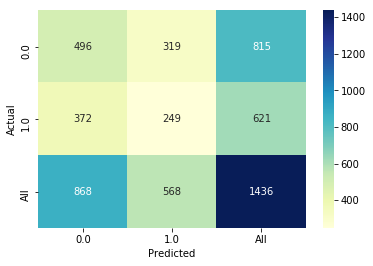

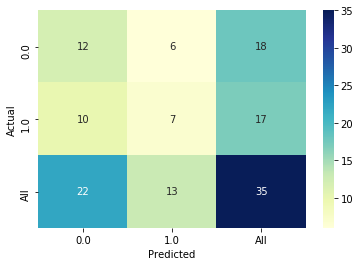

********************************
logistic_regression
best_params:  {'logisticregression__random_state': 0}
Stride-based model performance (mean):  [0.5336497776602158, 0.47736871526659624, 0.39671223837367287, 0.38891562409587666, 0.5431884091434697]
Stride-based model performance (standard deviation):  [0.08873144561276472, 0.26363987446177334, 0.1407927595152993, 0.13426602127837703, 0.11425622040745279]
Person-based model performance (mean):  [0.48571428571428577, 0.2866666666666667, 0.5666666666666667, 0.3355555555555556, 0.6]
Person-based model performance (standard deviation):  [0.14568627181693672, 0.17333333333333334, 0.38873012632302, 0.17643940658914853, 0.2073644135332772]


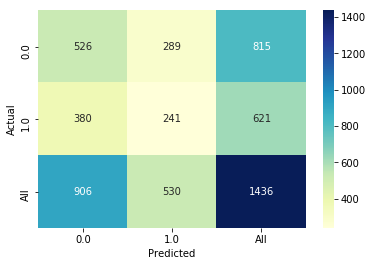

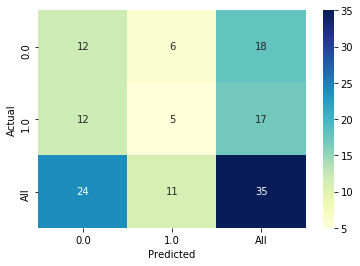

********************************
mlp
best_params:  {'mlpclassifier__hidden_layer_sizes': (5, 5, 5, 5, 5, 100, 50, 5, 50, 50)}
Stride-based model performance (mean):  [0.568039160095795, 0.0, 0.0, 0.0, 0.49835164835164836]
Stride-based model performance (standard deviation):  [0.22221119967015965, 0.0, 0.0, 0.0, 0.003296703296703307]
Person-based model performance (mean):  [0.5142857142857142, 0.0, 0.0, 0.0, 0.5]
Person-based model performance (standard deviation):  [0.19378085666072195, 0.0, 0.0, 0.0, 0.0]


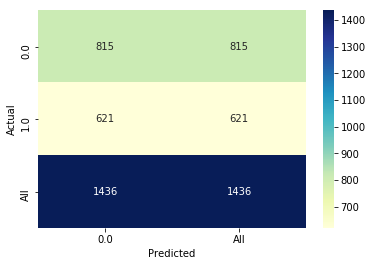

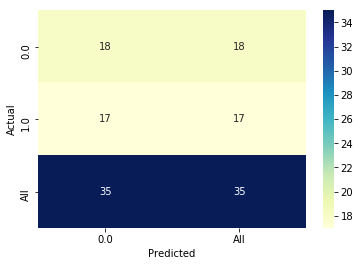

********************************


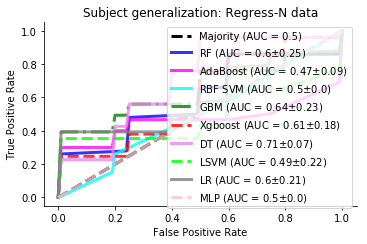

********************************
spatial_kinetic
random_forest
best_params:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 0.1, 'randomforestclassifier__n_estimators': 45}
Stride-based model performance (mean):  [0.6011938777198182, 0.48119876159706676, 0.49359065366525884, 0.47948201877669094, 0.4905610331763631]
Stride-based model performance (standard deviation):  [0.09874621879442538, 0.26296268083999064, 0.1817331770569727, 0.2260194262331858, 0.19440763889414256]
Person-based model performance (mean):  [0.6571428571428573, 0.5866666666666667, 0.6599999999999999, 0.5854545454545454, 0.5866666666666667]
Person-based model performance (standard deviation):  [0.06998542122237654, 0.18451136670797397, 0.23132468763863295, 0.15175012083538425, 0.2295890047696342]


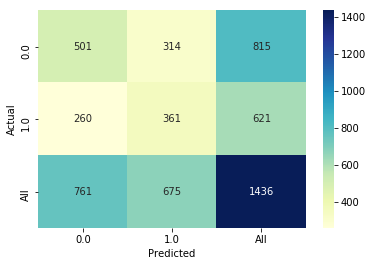

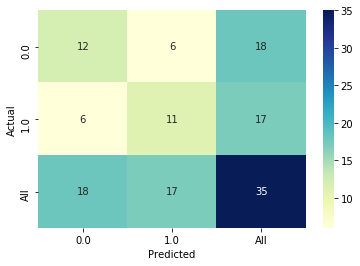

********************************
adaboost
best_params:  {'adaboostclassifier__learning_rate': 1.5, 'adaboostclassifier__n_estimators': 75}
Stride-based model performance (mean):  [0.5782846047893588, 0.5154960529063414, 0.44132801250054376, 0.4496404058519702, 0.512076987747036]
Stride-based model performance (standard deviation):  [0.08351357827792838, 0.2626484333540699, 0.10967721485051034, 0.16691255687188786, 0.17062157935575997]
Person-based model performance (mean):  [0.6571428571428571, 0.5333333333333333, 0.7166666666666666, 0.5876190476190477, 0.6633333333333333]
Person-based model performance (standard deviation):  [0.11428571428571428, 0.09189365834726813, 0.26666666666666666, 0.13747314724393242, 0.16746475582773956]


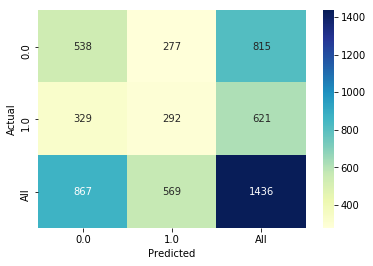

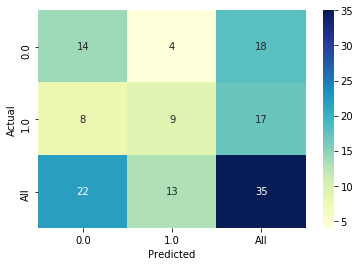

********************************
kernel_svm
best_params:  {'svc__gamma': 0.0001}
Stride-based model performance (mean):  [0.5687360242072933, 0.2, 0.001904761904761905, 0.003773584905660378, 0.5553300694405428]
Stride-based model performance (standard deviation):  [0.22242278476277094, 0.4, 0.00380952380952381, 0.0075471698113207565, 0.08338385945592813]
Person-based model performance (mean):  [0.5142857142857142, 0.0, 0.0, 0.0, 0.5333333333333333]
Person-based model performance (standard deviation):  [0.19378085666072195, 0.0, 0.0, 0.0, 0.06666666666666665]


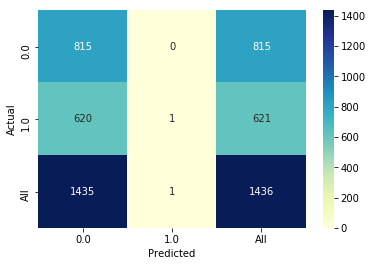

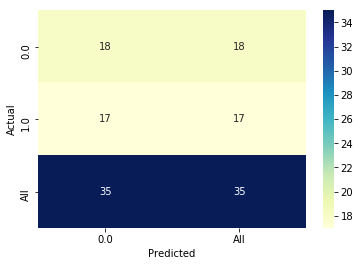

********************************
gbm
best_params:  {'gradientboostingclassifier__learning_rate': 0.15, 'gradientboostingclassifier__max_depth': 2, 'gradientboostingclassifier__max_features': 'sqrt', 'gradientboostingclassifier__min_samples_leaf': 1, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 100}
Stride-based model performance (mean):  [0.5607292211715527, 0.5176252754622975, 0.3434426585200515, 0.3873365545843812, 0.4982064305519522]
Stride-based model performance (standard deviation):  [0.13036151123856551, 0.2961074003650508, 0.07637797403754477, 0.1497223703442154, 0.19682840837963902]
Person-based model performance (mean):  [0.6, 0.42666666666666664, 0.7, 0.49428571428571433, 0.5966666666666667]
Person-based model performance (standard deviation):  [0.10690449676496977, 0.06463573143221772, 0.26666666666666666, 0.05466036134202571, 0.22666666666666668]


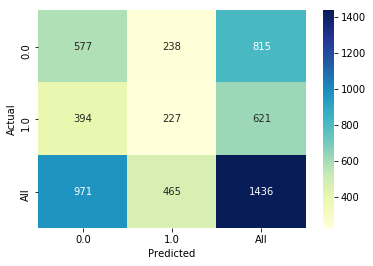

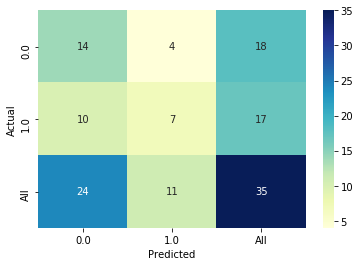

********************************
xgboost
best_params:  {'xgbclassifier__colsample_bytree': 0.6, 'xgbclassifier__gamma': 1, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__subsample': 0.8}
Stride-based model performance (mean):  [0.5407353784885822, 0.44110947631843966, 0.29729490366228106, 0.34407296074033983, 0.4604764667953113]
Stride-based model performance (standard deviation):  [0.10963132898049181, 0.3122235300153023, 0.14759908887190729, 0.20371552895310593, 0.20392924438934856]
Person-based model performance (mean):  [0.5142857142857142, 0.22666666666666666, 0.4333333333333333, 0.2942857142857143, 0.51]
Person-based model performance (standard deviation):  [0.06998542122237651, 0.18666666666666665, 0.38873012632302, 0.2463778415692583, 0.2690724809414742]


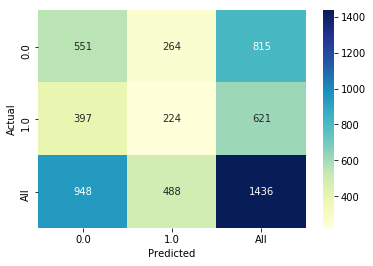

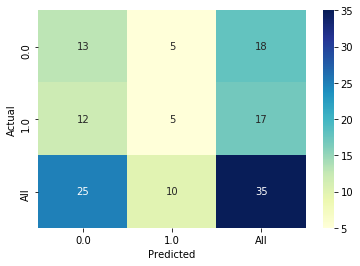

********************************
decision_tree
best_params:  {'decisiontreeclassifier__min_samples_split': 4}
Stride-based model performance (mean):  [0.5779549730045803, 0.44432843543779815, 0.31465891375001565, 0.36275600249209994, 0.5005726705091726]
Stride-based model performance (standard deviation):  [0.14261557098269936, 0.29775141885558626, 0.1888487873839658, 0.22346270661809203, 0.1499430753122454]
Person-based model performance (mean):  [0.5142857142857142, 0.18666666666666668, 0.3, 0.22999999999999998, 0.4166666666666667]
Person-based model performance (standard deviation):  [0.2649605284427344, 0.2436755584332942, 0.39999999999999997, 0.3026549190084311, 0.33730961708462714]


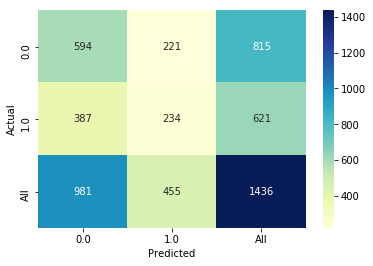

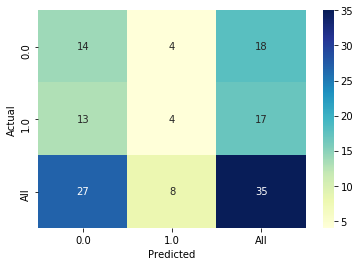

********************************
linear_svm
best_params:  {'linearsvc__loss': 'squared_hinge'}
Stride-based model performance (mean):  [0.6249086822758795, 0.474286180583167, 0.3960613127729284, 0.42434777818720304, 0.5704046330870133]
Stride-based model performance (standard deviation):  [0.05029813387083632, 0.3254420241525068, 0.24510278124388124, 0.2746336105803893, 0.16452525382432753]
Person-based model performance (mean):  [0.5999999999999999, 0.3066666666666667, 0.5599999999999999, 0.37428571428571433, 0.6466666666666666]
Person-based model performance (standard deviation):  [0.10690449676496977, 0.2969474326842679, 0.463033476111609, 0.32127297821418516, 0.2114500203620494]


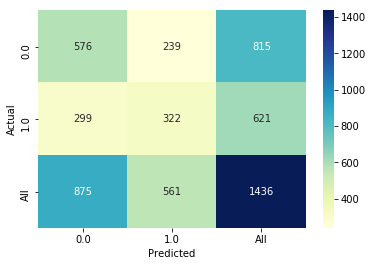

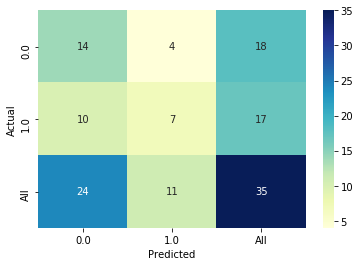

********************************
logistic_regression
best_params:  {'logisticregression__random_state': 0}
Stride-based model performance (mean):  [0.6205978265109104, 0.487685807222997, 0.39900417963362655, 0.42823370826957685, 0.5845554189065422]
Stride-based model performance (standard deviation):  [0.050236656713064785, 0.31374259868620136, 0.2260263740998788, 0.2560981206962761, 0.15095250536044394]
Person-based model performance (mean):  [0.6857142857142857, 0.4133333333333333, 0.5599999999999999, 0.47000000000000003, 0.5866666666666667]
Person-based model performance (standard deviation):  [0.10690449676496976, 0.3435759660460033, 0.463033476111609, 0.38418745424597095, 0.23814094799322336]


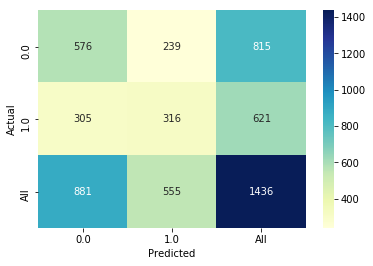

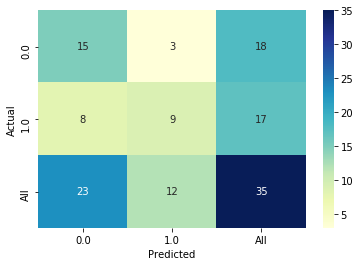

********************************
mlp
best_params:  {'mlpclassifier__hidden_layer_sizes': (21, 21, 5, 42, 42, 7, 42)}
Stride-based model performance (mean):  [0.6378534104841463, 0.5086056295808618, 0.4583007934330342, 0.47484538888377015, 0.5670671351601513]
Stride-based model performance (standard deviation):  [0.048632996878102464, 0.26623310140023315, 0.1907351097281997, 0.2233312748420001, 0.09922220176592127]
Person-based model performance (mean):  [0.6857142857142857, 0.5533333333333333, 0.62, 0.5800000000000001, 0.65]
Person-based model performance (standard deviation):  [0.13997084244475302, 0.2978441053825157, 0.3487119154832539, 0.31240998703626627, 0.10954451150103323]


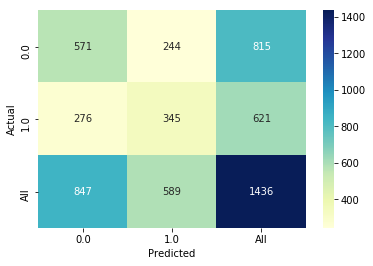

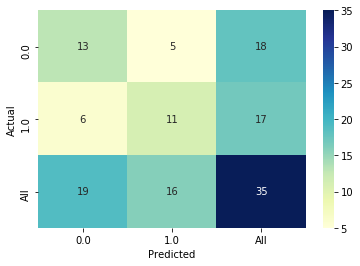

********************************


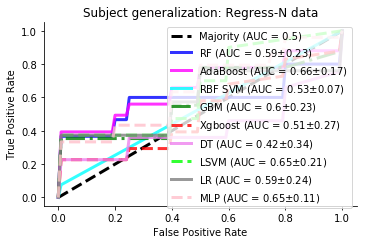

********************************
temporal_kinetic
random_forest
best_params:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 0.1, 'randomforestclassifier__n_estimators': 50}
Stride-based model performance (mean):  [0.5682799678732915, 0.4707061823574378, 0.49221527254914726, 0.4583002684227292, 0.5188126812136346]
Stride-based model performance (standard deviation):  [0.10137437239848093, 0.2928179320608859, 0.2320421351665358, 0.2503083481867722, 0.17790617321114674]
Person-based model performance (mean):  [0.5714285714285714, 0.6133333333333333, 0.5761904761904761, 0.5476190476190477, 0.6633333333333333]
Person-based model performance (standard deviation):  [0.127775312999988, 0.2114500203620494, 0.2897140665601375, 0.19401475035679389, 0.139204086785474]


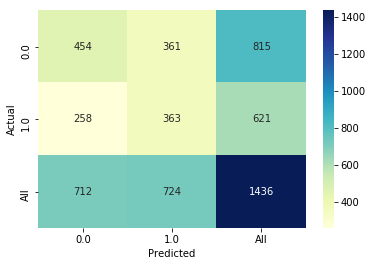

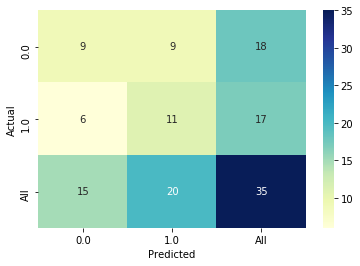

********************************
adaboost
best_params:  {'adaboostclassifier__learning_rate': 2, 'adaboostclassifier__n_estimators': 75}
Stride-based model performance (mean):  [0.6168628220224954, 0.6207276657801879, 0.28755975925640537, 0.373285185158703, 0.5566282611107348]
Stride-based model performance (standard deviation):  [0.1421881845902572, 0.30543839990404187, 0.12368674822249308, 0.16378250446526119, 0.07356890198994528]
Person-based model performance (mean):  [0.6, 0.2866666666666667, 0.8, 0.4142857142857143, 0.6233333333333333]
Person-based model performance (standard deviation):  [0.16659862556700858, 0.17333333333333334, 0.4000000000000001, 0.2340610614751335, 0.14204850501775013]


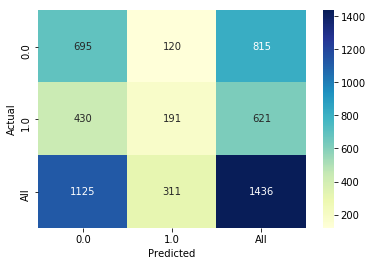

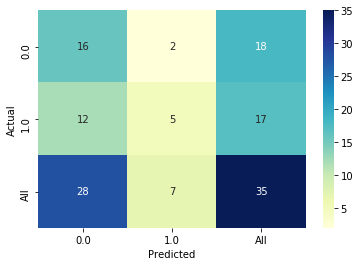

********************************
kernel_svm
best_params:  {'svc__gamma': 0.001}
Stride-based model performance (mean):  [0.5757029894798602, 0.5736079328756674, 0.14391204152267653, 0.21334879179771454, 0.5194247364399833]
Stride-based model performance (standard deviation):  [0.16769161001369678, 0.2837938669384674, 0.06012304707477218, 0.09479102729200925, 0.17021342665343228]
Person-based model performance (mean):  [0.6571428571428571, 0.3466666666666666, 1.0, 0.5, 0.5516666666666667]
Person-based model performance (standard deviation):  [0.19378085666072195, 0.13432961119739922, 0.0, 0.14907119849998596, 0.12914247085207015]


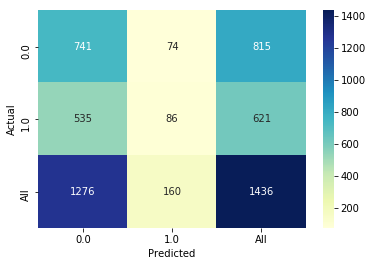

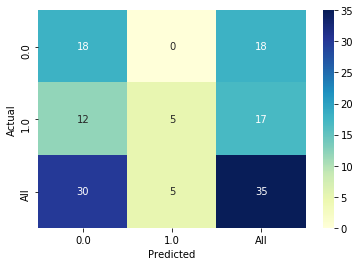

********************************
gbm
best_params:  {'gradientboostingclassifier__learning_rate': 0.15, 'gradientboostingclassifier__max_depth': 7, 'gradientboostingclassifier__max_features': 'sqrt', 'gradientboostingclassifier__min_samples_leaf': 3, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 150}
Stride-based model performance (mean):  [0.5412315557530523, 0.4899664598108748, 0.36644561368122297, 0.3773044226772255, 0.5712887834387235]
Stride-based model performance (standard deviation):  [0.07753189601843437, 0.31612898792373867, 0.14780875990401768, 0.19193646884581544, 0.13716564044284413]
Person-based model performance (mean):  [0.5428571428571429, 0.4533333333333333, 0.65, 0.47333333333333333, 0.6133333333333333]
Person-based model performance (standard deviation):  [0.16659862556700855, 0.15289793254906286, 0.31797973380564853, 0.17435595774162696, 0.1694435336951845]


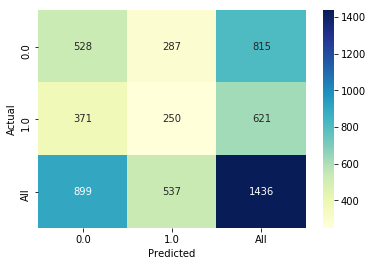

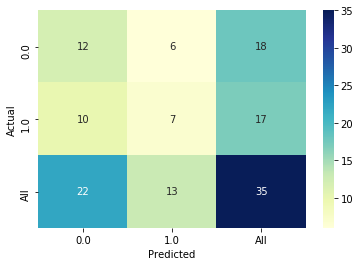

********************************
xgboost
best_params:  {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__gamma': 1, 'xgbclassifier__max_depth': 8, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__subsample': 1.0}
Stride-based model performance (mean):  [0.5452474499456723, 0.48666633425405353, 0.3799920091921401, 0.38524655918736694, 0.555324068973244]
Stride-based model performance (standard deviation):  [0.06922957809517408, 0.3064371692558674, 0.16640962047088145, 0.20030442232833207, 0.13772179257277953]
Person-based model performance (mean):  [0.5428571428571428, 0.4533333333333333, 0.65, 0.47333333333333333, 0.67]
Person-based model performance (standard deviation):  [0.16659862556700855, 0.15289793254906286, 0.31797973380564853, 0.17435595774162696, 0.13999999999999999]


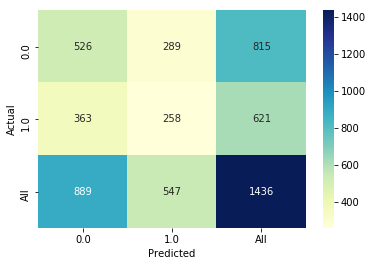

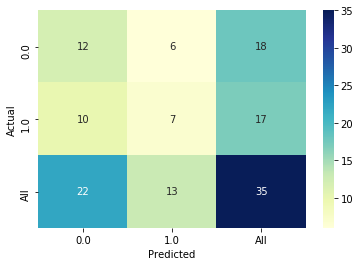

********************************
decision_tree
best_params:  {'decisiontreeclassifier__min_samples_split': 31}
Stride-based model performance (mean):  [0.5615123524218191, 0.49607857646229736, 0.4982425824109561, 0.4407690921260182, 0.5730194723934432]
Stride-based model performance (standard deviation):  [0.12303675832263981, 0.2631866410580955, 0.20027298628917736, 0.21742382569158902, 0.13378061050411066]
Person-based model performance (mean):  [0.5428571428571428, 0.5266666666666666, 0.43, 0.43873015873015875, 0.6233333333333333]
Person-based model performance (standard deviation):  [0.18952141659173713, 0.3504917180825311, 0.33105890714493696, 0.29166570564575506, 0.21176506899024786]


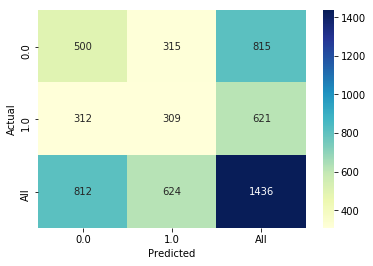

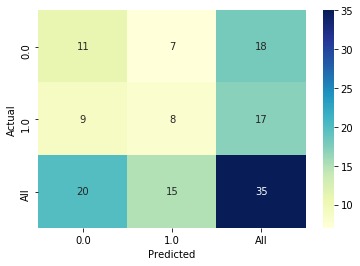

********************************
linear_svm
best_params:  {'linearsvc__loss': 'squared_hinge'}
Stride-based model performance (mean):  [0.5488119533422344, 0.46815052164666693, 0.3749621263937454, 0.37982084748291467, 0.5406755945931752]
Stride-based model performance (standard deviation):  [0.06688539211400456, 0.2968350635104432, 0.15519132082533152, 0.18590667724681584, 0.15505052377332795]
Person-based model performance (mean):  [0.6, 0.49333333333333335, 0.6499999999999999, 0.5133333333333333, 0.6366666666666667]
Person-based model performance (standard deviation):  [0.10690449676496978, 0.15972198067614585, 0.2260776661041756, 0.13597385369580753, 0.16343534229508352]


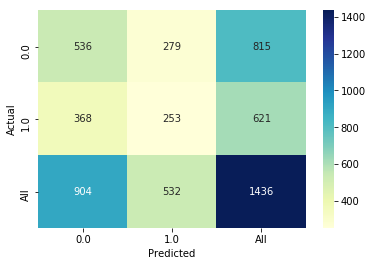

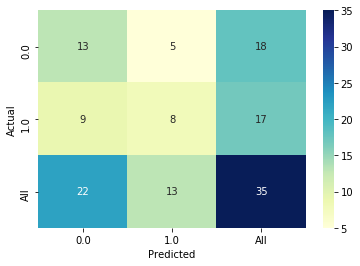

********************************
logistic_regression
best_params:  {'logisticregression__random_state': 0}
Stride-based model performance (mean):  [0.5583510334114923, 0.4706720973908703, 0.36180383479719247, 0.3741408007197481, 0.5498437932937372]
Stride-based model performance (standard deviation):  [0.06692746200566486, 0.30353575998496146, 0.16987945725932657, 0.20063671061336077, 0.16133114852716335]
Person-based model performance (mean):  [0.5714285714285714, 0.4333333333333333, 0.56, 0.44000000000000006, 0.6133333333333334]
Person-based model performance (standard deviation):  [0.127775312999988, 0.29514591494904874, 0.3542754734823046, 0.27840817357094805, 0.19160143817599887]


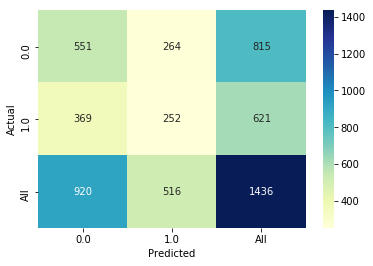

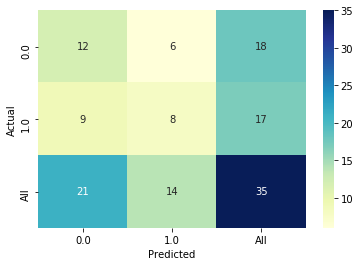

********************************
mlp
best_params:  {'mlpclassifier__hidden_layer_sizes': (42, 5, 42, 84, 7, 120, 84)}
Stride-based model performance (mean):  [0.6291067411184195, 0.5358397343817858, 0.5194666113890124, 0.5032240427323758, 0.6481394938918851]
Stride-based model performance (standard deviation):  [0.046567630888361265, 0.24920734545747675, 0.14937642847173552, 0.16937353523167165, 0.05731689225414266]
Person-based model performance (mean):  [0.6, 0.49333333333333335, 0.6499999999999999, 0.5133333333333333, 0.7466666666666668]
Person-based model performance (standard deviation):  [0.10690449676496978, 0.15972198067614585, 0.2260776661041756, 0.13597385369580753, 0.12400716825158847]


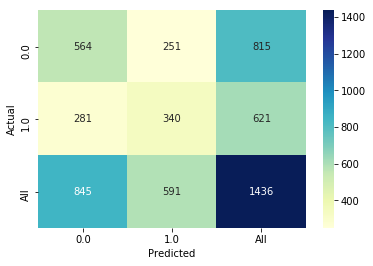

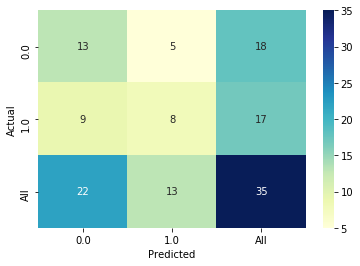

********************************


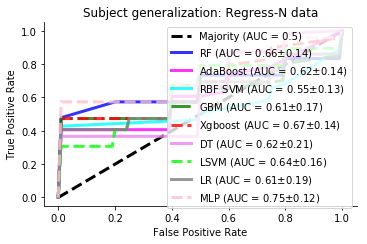

********************************


In [20]:
for col in datastreams:
    print (col)
    datastream = datastreams[col]
#     print (regressN_trainX_norm[datastream].head())
    stride_person_metrics = run_ml_models(ml_models, X_regressN[datastream], Y_regressN, data_type, results_dir, col)
    for i in stride_person_metrics.columns:
        regressN_metrics[(i, col)] = stride_person_metrics[i]
    print ('********************************')

if save_results:
    regressN_metrics.to_csv(results_path_subject_generalize_trad + results_dir + 'subject_generalize_ablation_study_regressN.csv')

In [21]:
regressN_metrics

,"(random_forest, spatial)","(random_forest, temporal)","(random_forest, kinetic)","(random_forest, spatiotemporal)","(random_forest, spatial_kinetic)","(random_forest, temporal_kinetic)","(adaboost, spatial)","(adaboost, temporal)","(adaboost, kinetic)","(adaboost, spatiotemporal)",...,"(logistic_regression, kinetic)","(logistic_regression, spatiotemporal)","(logistic_regression, spatial_kinetic)","(logistic_regression, temporal_kinetic)","(mlp, spatial)","(mlp, temporal)","(mlp, kinetic)","(mlp, spatiotemporal)","(mlp, spatial_kinetic)","(mlp, temporal_kinetic)"
sequence_mean_accuracy,0.546354,0.552051,0.583529,0.526474,0.601194,0.568280,0.615987,0.549406,0.616863,0.564105,...,0.579992,0.533650,0.620598,0.558351,0.588855,0.591102,0.648844,0.568039,0.637853,0.629107
sequence_mean_precision,0.489842,0.476575,0.469412,0.410033,0.481199,0.470706,0.589450,0.476200,0.620728,0.426635,...,0.484607,0.477369,0.487686,0.470672,0.526776,0.525773,0.392434,0.000000,0.508606,0.535840
sequence_mean_recall,0.444036,0.490873,0.470237,0.424054,0.493591,0.492215,0.433906,0.437314,0.287560,0.385543,...,0.361863,0.396712,0.399004,0.361804,0.430106,0.470554,0.296989,0.000000,0.458301,0.519467
sequence_mean_F1,0.427305,0.451340,0.449007,0.402409,0.479482,0.458300,0.425341,0.425638,0.373285,0.388377,...,0.395388,0.388916,0.428234,0.374141,0.447722,0.461748,0.332452,0.000000,0.474845,0.503224
sequence_mean_AUC,0.478084,0.588711,0.522702,0.452936,0.490561,0.518813,0.546759,0.554374,0.556628,0.509489,...,0.576428,0.543188,0.584555,0.549844,0.502503,0.652335,0.555328,0.498352,0.567067,0.648139
sequence_std_accuracy,0.117285,0.093744,0.096449,0.109612,0.098746,0.101374,0.081410,0.046541,0.142188,0.100636,...,0.083317,0.088731,0.050237,0.066927,0.092401,0.068513,0.131508,0.222211,0.048633,0.046568
sequence_std_precision,0.307866,0.276140,0.273112,0.264657,0.262963,0.292818,0.319113,0.278810,0.305438,0.272429,...,0.269279,0.263640,0.313743,0.303536,0.235262,0.270241,0.333152,0.000000,0.266233,0.249207
sequence_std_recall,0.228734,0.114597,0.225861,0.207167,0.181733,0.232042,0.243164,0.075438,0.123687,0.194051,...,0.114318,0.140793,0.226026,0.169879,0.098017,0.105309,0.244295,0.000000,0.190735,0.149376
sequence_std_F1,0.221712,0.176169,0.233955,0.236821,0.226019,0.250308,0.218728,0.163351,0.163783,0.206574,...,0.156556,0.134266,0.256098,0.200637,0.145651,0.127696,0.272162,0.000000,0.223331,0.169374
sequence_std_AUC,0.177486,0.132363,0.149627,0.178227,0.194408,0.177906,0.104970,0.124880,0.073569,0.124890,...,0.159863,0.114256,0.150953,0.161331,0.109128,0.091318,0.094671,0.003297,0.099222,0.057317


### Reading the final metrics from the saved file

In [22]:
ablation_subject_generalizeW = pd.read_csv(results_path_subject_generalize_trad + results_dir + 'subject_generalize_ablation_study_regressN.csv')
ablation_subject_generalizeW.index = ablation_subject_generalizeW['Unnamed: 0']
ablation_subject_generalizeW.drop('Unnamed: 0', axis = 1, inplace = True)

ablation_subject_generalizeW.columns = [literal_eval(ablation_subject_generalizeW.loc['person_mean_accuracy'].index[idx]) for idx in range(len(ablation_subject_generalizeW.loc['person_mean_accuracy'].index))]

In [23]:
ablation_subject_generalizeW

,"(random_forest, spatial)","(random_forest, temporal)","(random_forest, kinetic)","(random_forest, spatiotemporal)","(random_forest, spatial_kinetic)","(random_forest, temporal_kinetic)","(adaboost, spatial)","(adaboost, temporal)","(adaboost, kinetic)","(adaboost, spatiotemporal)",...,"(logistic_regression, kinetic)","(logistic_regression, spatiotemporal)","(logistic_regression, spatial_kinetic)","(logistic_regression, temporal_kinetic)","(mlp, spatial)","(mlp, temporal)","(mlp, kinetic)","(mlp, spatiotemporal)","(mlp, spatial_kinetic)","(mlp, temporal_kinetic)"
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
sequence_mean_accuracy,0.546354,0.552051,0.583529,0.526474,0.601194,0.568280,0.615987,0.549406,0.616863,0.564105,...,0.579992,0.533650,0.620598,0.558351,0.588855,0.591102,0.648844,0.568039,0.637853,0.629107
sequence_mean_precision,0.489842,0.476575,0.469412,0.410033,0.481199,0.470706,0.589450,0.476200,0.620728,0.426635,...,0.484607,0.477369,0.487686,0.470672,0.526776,0.525773,0.392434,0.000000,0.508606,0.535840
sequence_mean_recall,0.444036,0.490873,0.470237,0.424054,0.493591,0.492215,0.433906,0.437314,0.287560,0.385543,...,0.361863,0.396712,0.399004,0.361804,0.430106,0.470554,0.296989,0.000000,0.458301,0.519467
sequence_mean_F1,0.427305,0.451340,0.449007,0.402409,0.479482,0.458300,0.425341,0.425638,0.373285,0.388377,...,0.395388,0.388916,0.428234,0.374141,0.447722,0.461748,0.332452,0.000000,0.474845,0.503224
sequence_mean_AUC,0.478084,0.588711,0.522702,0.452936,0.490561,0.518813,0.546759,0.554374,0.556628,0.509489,...,0.576428,0.543188,0.584555,0.549844,0.502503,0.652335,0.555328,0.498352,0.567067,0.648139
sequence_std_accuracy,0.117285,0.093744,0.096449,0.109612,0.098746,0.101374,0.081410,0.046541,0.142188,0.100636,...,0.083317,0.088731,0.050237,0.066927,0.092401,0.068513,0.131508,0.222211,0.048633,0.046568
sequence_std_precision,0.307866,0.276140,0.273112,0.264657,0.262963,0.292818,0.319113,0.278810,0.305438,0.272429,...,0.269279,0.263640,0.313743,0.303536,0.235262,0.270241,0.333152,0.000000,0.266233,0.249207
sequence_std_recall,0.228734,0.114597,0.225861,0.207167,0.181733,0.232042,0.243164,0.075438,0.123687,0.194051,...,0.114318,0.140793,0.226026,0.169879,0.098017,0.105309,0.244295,0.000000,0.190735,0.149376
sequence_std_F1,0.221712,0.176169,0.233955,0.236821,0.226019,0.250308,0.218728,0.163351,0.163783,0.206574,...,0.156556,0.134266,0.256098,0.200637,0.145651,0.127696,0.272162,0.000000,0.223331,0.169374


### Heatmap for person mean accuracy for all algorithms and data streams for Subject generalize in trial W

In [24]:
person_accuracy_subject_generlaizeW = pd.DataFrame(columns = ['random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'decision_tree',  'linear_svm', 
             'logistic_regression', 'mlp'], index = list(datastreams.keys()))


for idx in range(len(ablation_subject_generalizeW.columns)):
    x = ablation_subject_generalizeW.loc['person_mean_accuracy'].index[idx][1]
    y = ablation_subject_generalizeW.loc['person_mean_accuracy'].index[idx][0]
#     print (regressN_metrics.loc['person_accuracy'][(y, x)])
    person_accuracy_subject_generlaizeW.loc[x, y] = ablation_subject_generalizeW.loc['person_mean_accuracy'][(y, x)]

person_accuracy_subject_generlaizeW = person_accuracy_subject_generlaizeW.astype(float)

In [25]:
#Adding the person mean accuracy for all the models using all the features 
person_accuracy_subject_generlaizeW.loc['All features'] = [np.nan]*9

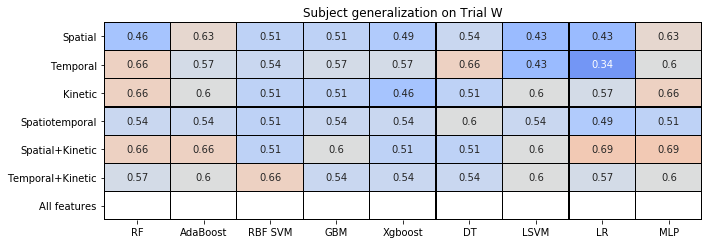

In [26]:
ml_model_names1 = ['RF','AdaBoost', 'RBF SVM', 'GBM','Xgboost', 'DT',  'LSVM', 'LR', 'MLP']
datasets = ['Spatial', 'Temporal', 'Kinetic', 'Spatiotemporal', 'Spatial+Kinetic', \
       'Temporal+Kinetic', 'All features']
fig, axes = plt.subplots(1, 1, figsize=(10, 3.5))
sns.heatmap(person_accuracy_subject_generlaizeW, vmin=0.3, vmax=1.0, center = 0.6, cmap="coolwarm", annot=True, linewidths=0.4, linecolor="k", \
            cbar = False, xticklabels=ml_model_names1,  yticklabels=datasets)
plt.title('Subject generalization on Trial W')
plt.tight_layout()
plt.savefig(results_path_subject_generalize_trad + results_dir + 'subject_generalize_ablation_study_'+ data_type +'_heatmap.jpg', dpi = 250)
plt.show()